<h1> Datos para probar las técnicas de analísis. </h1>

<h2>Los pasos que intentare seguir para tener una metodología son:</h2>

    <li>Paso cero: Extraccion de los datos, limpieza, reducción y eliminación en los casos que apliquen.</li>
    <li>Paso uno: Estandarizar, normalizar y/o reducir los datos.</li>
    <li>Paso dos: Codificar las variables categoricas.</li>
    <li>Paso tres: Escojer el médelo de machine learning que nos ayude a resolver el problema</li>

<p>Estos datos se bajaron de kaggle. Es una empresa que tiene farmacias en toda europa. Así que busca conocer </p>
<p>el comportamiento de sus ventas. Lo que vamos a realizar es una analísis de regresión multivariable. </p>

In [7]:
#Vamos a importar las librerias para manipular datos. 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [8]:
#Importemos los datos de entrenamiento y verifiquemos su tamaño 
train = pd.read_csv("DrugStoreTrain.csv")
print("Tamaño de la matriz\n", train.shape)
print("Informacion de las primeras columnas\n", train.head())
#Aqui observamos las ventas de cada tienda por fecha

Tamaño de la matriz
 (1017209, 9)
Informacion de las primeras columnas
    Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


C:\Users\EQUIPO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#Importemos los datos de cada farmacia.
store = pd.read_csv("DrugStore.csv")
print("Tamaño de la matriz\n", store.shape)
print("Informacion de las primeras columnas\n", store.head())
#Aquiobservamos las caracteristicas de cada tienda.

Tamaño de la matriz
 (1115, 10)
Informacion de las primeras columnas
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

    

In [245]:
#Vamos a unir las matrices para poder realizar el analísis con base en sus caracteristica y no solo el tiempo. 
df = store.merge(train,on=["Store"], how="inner")
print("El nuevo tamaño de la matriz\n", df.shape)
print("Las primeras filas\n", df.head(5))

El nuevo tamaño de la matriz
 (1017209, 18)
Las primeras filas
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      1         c          a               1270.0                        9.0   
2      1         c          a               1270.0                        9.0   
3      1         c          a               1270.0                        9.0   
4      1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN              NaN   

  PromoInt

In [246]:
print("Miremos cuanta información esta perdida: \n", df.isnull().sum()  )
print( "Miremos el resultado en procentaje \n", df.isnull().sum()/df.shape[0]*100)

Miremos cuanta información esta perdida: 
 Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64
Miremos el resultado en procentaje 
 Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                   

In [247]:
#Las siguiente columnas serán elimnadas de la matriz ya que superan un 30 porciento de datos perdidos.|
df = df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"], axis=1)
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [248]:
#Se corregira el .25 porciento de "competitiondistance", se llena la información con la moda de esa variable.
df["CompetitionDistance"]=df["CompetitionDistance"].fillna(df["CompetitionDistance"].mode()[0])
print("Miremos cuanta información esta perdida: \n", df.isnull().sum()  )
print( "Miremos el resultado en procentaje \n", df.isnull().sum()/df.shape[0]*100)

Miremos cuanta información esta perdida: 
 Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
dtype: int64
Miremos el resultado en procentaje 
 Store                  0.0
StoreType              0.0
Assortment             0.0
CompetitionDistance    0.0
Promo2                 0.0
DayOfWeek              0.0
Date                   0.0
Sales                  0.0
Customers              0.0
Open                   0.0
Promo                  0.0
StateHoliday           0.0
SchoolHoliday          0.0
dtype: float64


In [249]:
#Cantidad de farmacias que se estan analizando, sus ventas diarias en genral y los dias que se tomo la información.
print("Cantidad de farmacias diferentes:\n",len(df["Store"].unique()))
print("Cantidad de dias diferentes:\n", len(df["Date"].unique()))
print("Venta promedio diaria:\n ",round(df["Sales"].mean(),2))

Cantidad de farmacias diferentes:
 1115
Cantidad de dias diferentes:
 942
Venta promedio diaria:
  5773.82


In [250]:
#Ahora comencemos a diferenciar los tipos de variables que tenemos en la matriz. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   StoreType            1017209 non-null  object 
 2   Assortment           1017209 non-null  object 
 3   CompetitionDistance  1017209 non-null  float64
 4   Promo2               1017209 non-null  int64  
 5   DayOfWeek            1017209 non-null  int64  
 6   Date                 1017209 non-null  object 
 7   Sales                1017209 non-null  int64  
 8   Customers            1017209 non-null  int64  
 9   Open                 1017209 non-null  int64  
 10  Promo                1017209 non-null  int64  
 11  StateHoliday         1017209 non-null  object 
 12  SchoolHoliday        1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


In [251]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = df.select_dtypes("object")
columnas_numericas = df.select_dtypes(np.number)

In [252]:
print( "Hay que analizar las variables numericas ")
columnas_numericas.columns

Hay que analizar las variables numericas 


Index(['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Sales',
       'Customers', 'Open', 'Promo', 'SchoolHoliday'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>]], dtype=object)

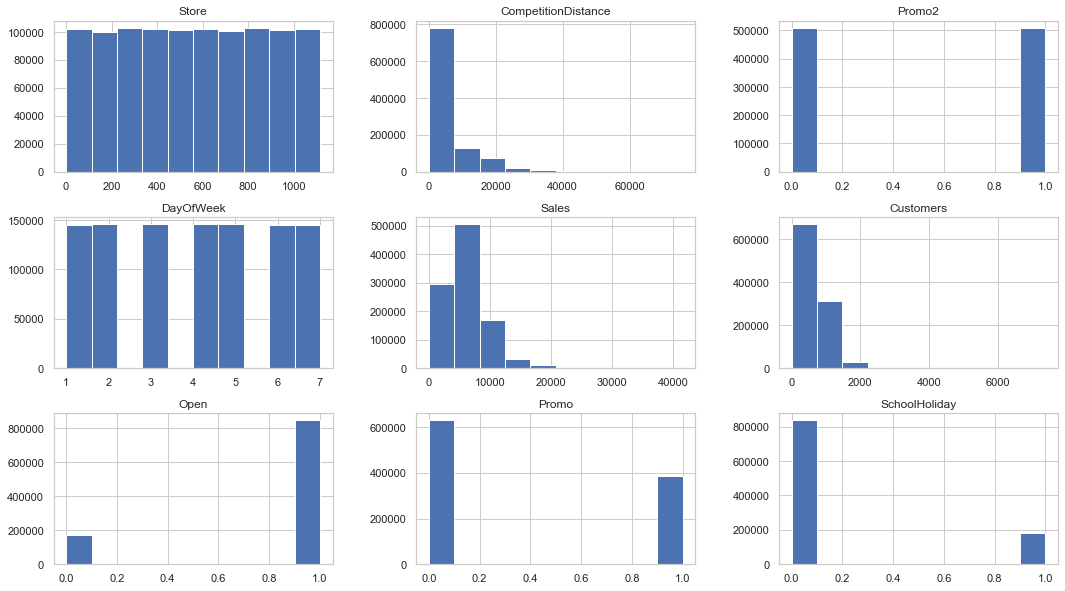

In [253]:
df.hist(figsize=(18,10))
#Encontramos variables categoricas pero ya codificadas. Y observamos graficos que muestran algunos aoutliers por ejemplo:
#la variable que nos interesa predecir. 

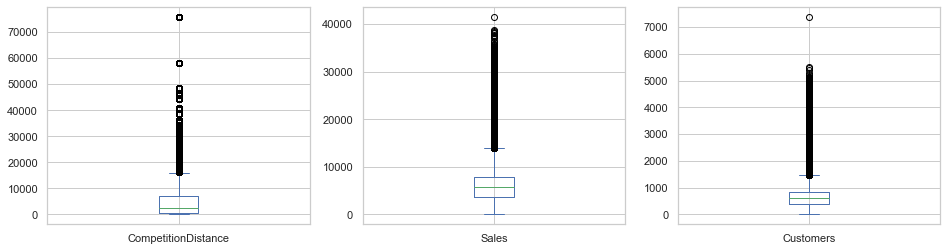

In [254]:
#Las variables promo2,open,promo y schoolholiday son categoricas ya codificadas. 
#Así que analizamos las variables realmente numericas ppara buscar aoutliers ya que la forma de la gráfica nos muestra que hay.
#La variable store y dayofweek tiene una distribucion normal.
columnas_numericas = ['CompetitionDistance', 'Sales', 'Customers' ]
#Aquí ya miramos que si existen ouliers. Bueno hay que limpiar estos datos y todos aquellos que esten en la misma situación.
plt.figure(figsize = (16, 4))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, len(columnas_numericas), i+1)
    df[col].plot(kind = 'box')

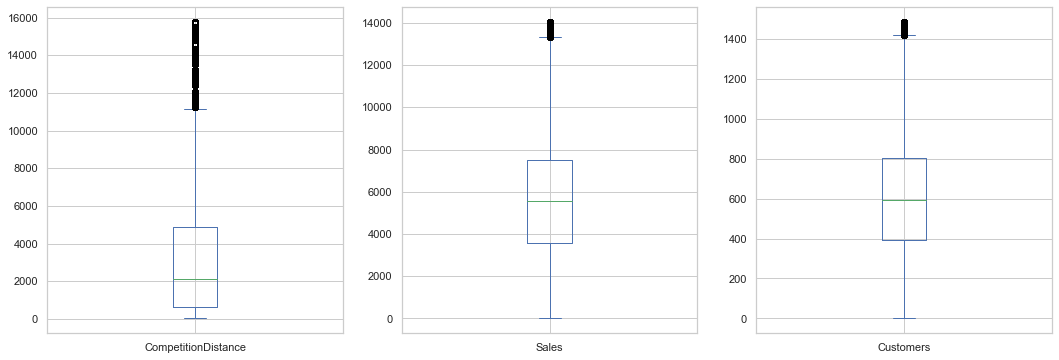

In [255]:
#Vamos a remover los "outliers para poder tener datos que nos ayuden a tener mejores resultados la entrenar el red neuronal. 
columnas_numericas = ['CompetitionDistance', 'Sales', 'Customers' ]
def remover_outliers(df, columnas):
    df = df.copy()
    for col in columnas:
        q1 = df[col].quantile(q = 0.25)
        q3 = df[col].quantile(q = 0.75)
        intr_qr = q3 - q1
        upper_range = q3 + (1.5*intr_qr)
        lower_range = q1 - (1.5*intr_qr)
        df.loc[df[col] > upper_range, col] = np.nan
        df.loc[df[col] < lower_range, col] = np.nan
    return df.dropna()

df = remover_outliers(df, columnas_numericas)

plt.figure(figsize = (18, 6))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, len(columnas_numericas), i+1)
    df[col].plot(kind = 'box')

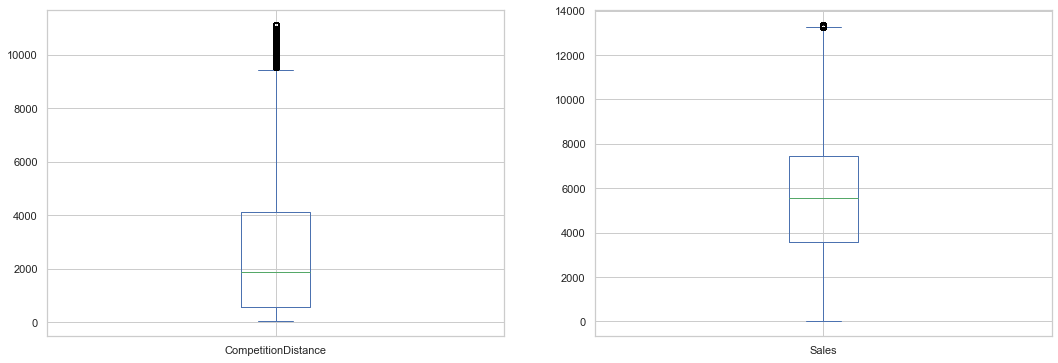

In [256]:
#Volvamos a limpiar las siguientes variables
columnas_numericas = ['CompetitionDistance', 'Sales' ]

df = remover_outliers(df, columnas_numericas)

plt.figure(figsize = (18, 6))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, len(columnas_numericas), i+1)
    df[col].plot(kind = 'box')

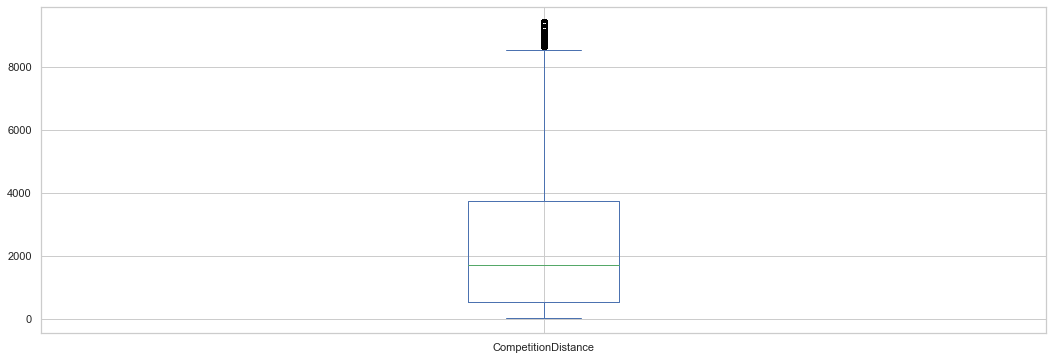

In [257]:
#Volvamos a limpiar las siguientes variables
columnas_numericas = ['CompetitionDistance']

df = remover_outliers(df, columnas_numericas)

plt.figure(figsize = (18, 6))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, len(columnas_numericas), i+1)
    df[col].plot(kind = 'box')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>]], dtype=object)

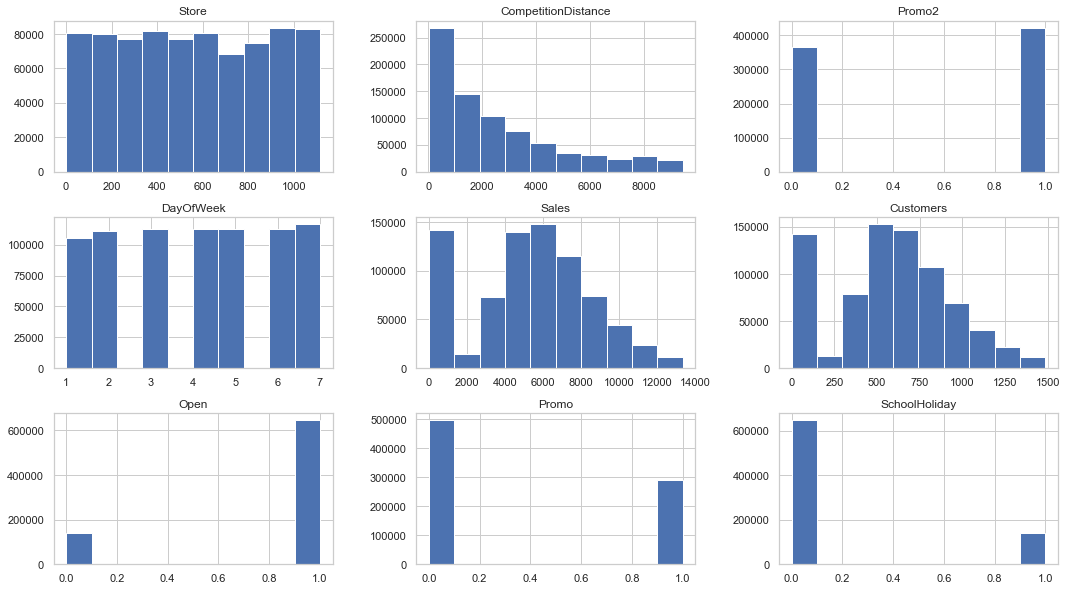

In [258]:
df.hist(figsize=(18,10))

In [259]:
print( "Hay que analizar las variables categoricas  o de tiempos ")
columnas_categoricas.columns

Hay que analizar las variables categoricas  o de tiempos 


Index(['StoreType', 'Assortment', 'Date', 'StateHoliday'], dtype='object')

In [260]:
#LA variable "date" esta calificada como categorica. Pongamos la data como debe ser de tiempo.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) #El método da el formato correcto en este caso. 
#la columa de fecha podemos expandar los datos en meses, cuartos, etc.. para una mejor clasificación por época del año.
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week
df["Season"] = np.where(df["Month"].isin([3,4,5]),"Spring", np.where(df["Month"].isin([6,7,8]), "Summer",
                np.where(df["Month"].isin([9,10,11]),"Fall", np.where(df["Month"].isin([12,1,2]),"Winter","None"))))              
    
df.head(5)

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_5584\4183395282.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df["Date"].dt.week


,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Quarter,Year,Day,Week,Season
0,1,c,a,1270.0,0,5,2015-07-31,5263.0,555.0,1,1,0,1,7,3,2015,31,31,Summer
1,1,c,a,1270.0,0,4,2015-07-30,5020.0,546.0,1,1,0,1,7,3,2015,30,31,Summer
2,1,c,a,1270.0,0,3,2015-07-29,4782.0,523.0,1,1,0,1,7,3,2015,29,31,Summer
3,1,c,a,1270.0,0,2,2015-07-28,5011.0,560.0,1,1,0,1,7,3,2015,28,31,Summer
4,1,c,a,1270.0,0,1,2015-07-27,6102.0,612.0,1,1,0,1,7,3,2015,27,31,Summer


In [261]:
#Al cambiar el parametro nos podemos dar cuenta que nuestra primera impresion de que 
#no hay diferencias entre las farmacias no es muy difernete por ser una distribución normal. 
#El tipo de tienda si afecta el resultado.
#Ya hemos limpiando los datos, analizado sus formas y sus relaciones, y eliminado columnas que nos nos ayudan. 
#Ahora miremos cuantas variables categoricas quedan y como las trabajaremos 
print("Verifiquemos las variables categoricas que nos quedan:\n", df.dtypes )
print("La varible y sus categorias:\n", df["StoreType"].value_counts() )
print("La varible y sus categorias:\n", df["Assortment"].value_counts() )
print("La varible y sus categorias:\n", df["StateHoliday"].value_counts() )
print("La varible y sus categorias:\n", df["Season"].value_counts() )
#Aqui observamos que la columna "stateholiday" no se ha categorizado del todo, aunque no tiene valores perdidos si tiene 
#ceros en lugar de la categoria, así que la elimineria pero la voy a dejar hasta categorizarla por ahora.

Verifiquemos las variables categoricas que nos quedan:
 Store                           int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
DayOfWeek                       int64
Date                   datetime64[ns]
Sales                         float64
Customers                     float64
Open                            int64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
Month                           int64
Quarter                         int64
Year                            int64
Day                             int64
Week                            int64
Season                         object
dtype: object
La varible y sus categorias:
 a    431780
d    227601
c    121186
b      5707
Name: StoreType, dtype: int64
La varible y sus categorias:
 a    438969
c    344743
b      2562
Name: Assortment, dtype: int64
La 

In [262]:
df["StateHoliday"]= np.where(df["StateHoliday"] == 0,0,1)
df["StateHoliday"].value_counts()

1    684499
0    101775
Name: StateHoliday, dtype: int64

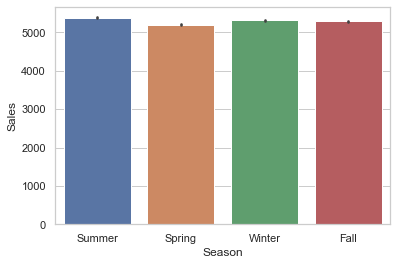

In [126]:
import seaborn as sns 
sns.set(style="whitegrid")
#¨Podemos entender las ventas durante las estaciones del año. 
ax = sns.barplot(x="Season", y="Sales", data=df)

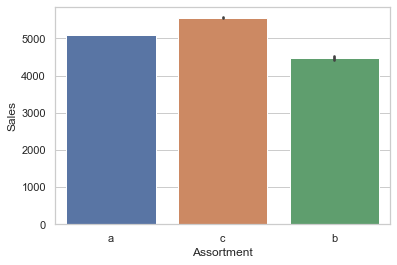

In [127]:
#Miremos la forma de las ventas y diferentes categorias
ax = sns.barplot(x="Assortment", y="Sales", data=df)

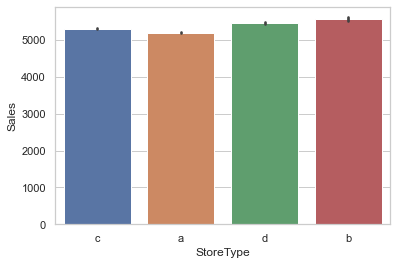

In [128]:
#Miremos las ventas y los diferentes de tienda
ax = sns.barplot(x="StoreType", y="Sales", data=df)

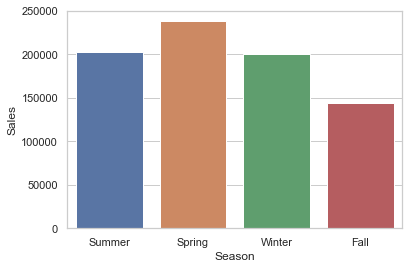

In [129]:
#Seaborn calcula el promedio de las variables, si queremos mirar la cantidad hay que modificar el método.
ax = sns.barplot(x="Season", y="Sales", data=df, estimator=np.size)

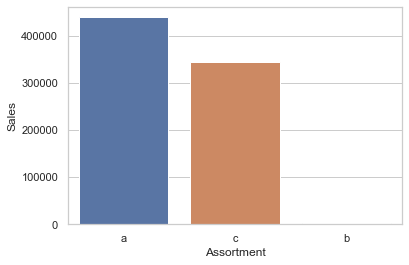

In [130]:
ax = sns.barplot(x="Assortment", y="Sales", data=df, estimator=np.size)

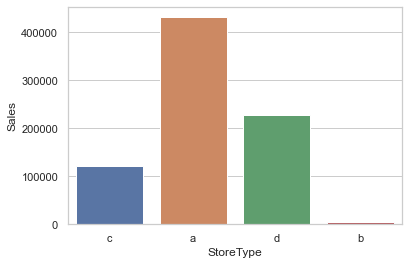

In [131]:
ax = sns.barplot(x="StoreType", y="Sales", data=df, estimator=np.size)

In [263]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columnas_categoricas=['StoreType','Assortment','Season','Year']

for col in columnas_categoricas:    
    print('\n')
    print('Columns Name: %s' %col)
    print('************')
    df[col] = df[[col]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)



Columns Name: StoreType
************
a : 0
b : 1
c : 2
d : 3


Columns Name: Assortment
************
a : 0
b : 1
c : 2


Columns Name: Season
************
Fall : 0
Spring : 1
Summer : 2
Winter : 3


Columns Name: Year
************
2013 : 0
2014 : 1
2015 : 2


In [271]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
columnas_categoricas=['StoreType','Assortment','Season','Year']

for col in columnas_categoricas:    
    print('\n')
    print('Columns Name: %s' %col)
    print('************')
    df[col] = df[[col]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)
        
#print("Shape of Data:",temp.shape)
#print("Distinct Datatypes:",temp.dtypes.unique())

(786274, 19)

In [276]:
X = df.loc[:, ['Store', 'StoreType', 'Assortment','CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'Season']]
y = df.loc[:, ["Sales"]]
print( X.shape, y.shape)

(786274, 17) (786274, 1)


In [277]:
from sklearn.model_selection import train_test_split
#Primero se separan los datosn en un 80 - 20 
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=2018)
#Com en keras se necesitan tres conjuntos de datos para entrenar separemos el train set para validar
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)
#Revisar los tamaños seleccionados
print("Tamaño de x_train:",x_train.shape)
print("Tamaño de x_val:",x_val.shape)
print("Tamaño de x_test:",x_test.shape)
print("Tamaño de y_train:",y_train.shape)
print("Tamaño de y_val:",y_val.shape)
print("Tamaño de y_test:",y_test.shape)

Tamaño de x_train: (566117, 17)
Tamaño de x_val: (62902, 17)
Tamaño de x_test: (157255, 17)
Tamaño de y_train: (566117, 1)
Tamaño de y_val: (62902, 1)
Tamaño de y_test: (157255, 1)


In [268]:
mean_sales = y_train.mean()
print("Venta promedio de la nueva matriz :",mean_sales)

Venta promedio de la nueva matriz : Sales    5295.717115
dtype: float64


In [269]:
print("MAE para los datos de prueba:", abs(y_test - mean_sales).mean()[0])

MAE para los datos de prueba: 2577.611763921999


In [278]:
#Crear elmodelo en keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(150,input_dim=17,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])
model.fit(x_train,y_train, epochs=3,batch_size=64, validation_data=(x_val,y_val))

Epoch 1/3
8846/8846 [==============================] - 42s 5ms/step - loss: 831.0571 - mean_absolute_error: 831.0571 - val_loss: 752.7201 - val_mean_absolute_error: 752.7201
Epoch 2/3
8846/8846 [==============================] - 41s 5ms/step - loss: 719.6141 - mean_absolute_error: 719.6141 - val_loss: 707.1924 - val_mean_absolute_error: 707.1924
Epoch 3/3
8846/8846 [==============================] - 42s 5ms/step - loss: 693.8527 - mean_absolute_error: 693.8527 - val_loss: 691.3671 - val_mean_absolute_error: 691.3671


In [280]:
#Evaluar los datos de prueba.
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

4915/4915 [==============================] - 18s 4ms/step - loss: 685.4348 - mean_absolute_error: 685.4348
Metric  loss : 685.43
Metric  mean_absolute_error : 685.43


In [281]:
#Mejorando el modelo
model = Sequential()
model.add(Dense(150,input_dim = 17,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val, y_val),epochs=3,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/3
8846/8846 [==============================] - 74s 8ms/step - loss: 1222619.3750 - mean_absolute_error: 752.3726 - val_loss: 1056767.7500 - val_mean_absolute_error: 722.2122
Epoch 2/3
8846/8846 [==============================] - 86s 10ms/step - loss: 1003751.6875 - mean_absolute_error: 688.3765 - val_loss: 1008366.8750 - val_mean_absolute_error: 692.1786
Epoch 3/3
4915/4915 [==============================] - 23s 5ms/step - loss: 942940.2500 - mean_absolute_error: 660.6961
Metric  loss : 942940.25
Metric  mean_absolute_error : 660.7


In [282]:
#Mejorando el modelo
model = Sequential()
model.add(Dense(150,input_dim = 17,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=5,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/5
8846/8846 [==============================] - 111s 12ms/step - loss: 1230698.7500 - mean_absolute_error: 755.0178 - val_loss: 1050284.5000 - val_mean_absolute_error: 715.6917
Epoch 2/5
8846/8846 [==============================] - 109s 12ms/step - loss: 1008652.4375 - mean_absolute_error: 690.0755 - val_loss: 998247.6875 - val_mean_absolute_error: 677.2601
Epoch 3/5
8846/8846 [==============================] - 96s 11ms/step - loss: 979480.8125 - mean_absolute_error: 678.0793 - val_loss: 938333.8125 - val_mean_absolute_error: 665.3095
Epoch 4/5
8846/8846 [==============================] - 111s 13ms/step - loss: 950026.0000 - mean_absolute_error: 666.4813 - val_loss: 920003.6250 - val_mean_absolute_error: 662.3773
Epoch 5/5
4915/4915 [==============================] - 32s 6ms/step - loss: 982791.6250 - mean_absolute_error: 691.6963
Metric  loss : 982791.62
Metric  mean_absolute_error : 691.7


In [283]:
#Aumentado el numero de beuronas
model = Sequential()
model.add(Dense(350,input_dim = 17,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=5,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

Epoch 1/5
8846/8846 [==============================] - 119s 13ms/step - loss: 1194451.1250 - mean_absolute_error: 748.5118 - val_loss: 1043130.5000 - val_mean_absolute_error: 696.8441
Epoch 2/5
8846/8846 [==============================] - 119s 13ms/step - loss: 995218.5000 - mean_absolute_error: 686.9284 - val_loss: 976527.8125 - val_mean_absolute_error: 691.2936
Epoch 3/5
8846/8846 [==============================] - 124s 14ms/step - loss: 962582.0000 - mean_absolute_error: 674.3230 - val_loss: 916622.3125 - val_mean_absolute_error: 657.1542
Epoch 4/5
8846/8846 [==============================] - 111s 13ms/step - loss: 928432.0000 - mean_absolute_error: 662.1665 - val_loss: 888950.1250 - val_mean_absolute_error: 648.3039
Epoch 5/5
4915/4915 [==============================] - 38s 8ms/step - loss: 911971.4375 - mean_absolute_error: 650.2743
Metric  loss : 911971.44
Metric  mean_absolute_error : 650.27


In [284]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(350,input_dim = 17,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=5,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/5
8846/8846 [==============================] - 329s 37ms/step - loss: 1191763.0000 - mean_absolute_error: 745.8408 - val_loss: 1034077.9375 - val_mean_absolute_error: 710.4484
Epoch 2/5
8846/8846 [==============================] - 320s 36ms/step - loss: 1006229.1875 - mean_absolute_error: 687.8307 - val_loss: 981360.2500 - val_mean_absolute_error: 685.3764
Epoch 3/5
8846/8846 [==============================] - 317s 36ms/step - loss: 962273.2500 - mean_absolute_error: 671.3411 - val_loss: 1027475.4375 - val_mean_absolute_error: 715.0392
Epoch 4/5
8846/8846 [==============================] - 319s 36ms/step - loss: 916758.1875 - mean_absolute_error: 654.2156 - val_loss: 877215.6875 - val_mean_absolute_error: 642.7141
Epoch 5/5
4915/4915 [==============================] - 50s 10ms/step - loss: 813020.1250 - mean_absolute_error: 609.9435
Metric  loss : 813020.12
Metric  mean_absolute_error : 609.94


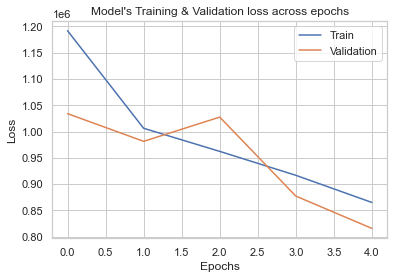

In [285]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [286]:

y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
13825            0.0         0.015545
752766           0.0         0.015545
642359        8432.0      9087.894531
147019        8247.0      6913.180664
865574        4747.0      5363.104004
436332        5437.0      6581.959961
93882         5109.0      5374.132324
564872        9593.0      8709.191406
623437        8420.0      6720.730469
758271           0.0         0.015545
MSE : 813020.0292173647
MAE : 609.9435279535764
